In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
pats_mimic

,stay,period_length
0,10003_episode1_timeseries.csv,35.8824
1,10004_episode1_timeseries.csv,251.1960
2,10004_episode2_timeseries.csv,17.5800
3,10006_episode1_timeseries.csv,39.1800
4,10007_episode1_timeseries.csv,198.9936
...,...,...
29245,99995_episode1_timeseries.csv,51.8760
29246,99999_episode1_timeseries.csv,26.9808
29247,9999_episode1_timeseries.csv,26.6928
29248,999_episode1_timeseries.csv,17.2440


In [9]:
pats = pd.read_csv("/data/datasets/mimic3-benchmarks/data/phenotyping/train_listfile.csv")
pats = pats[["stay","period_length"]]
pats_mimic = pats
count = 0
for filename, period_length in zip(pats_mimic['stay'], pats_mimic['period_length']):
    curr = pd.read_csv(f"/data/datasets/mimic3-benchmarks/data/phenotyping/train/{filename}")
    mx = curr['Hours'].max()

    if mx > period_length:
        print(curr, period_length, mx)
        count+=1

print("FINAL:", count/len(pats_mimic))


pats = pd.read_csv("/data/datasets/mimic3-benchmarks/data/phenotyping/train_listfile.csv")
pats = pats[["stay","period_length"]]
pats_mimic = pats
count = 0
for filename, period_length in zip(pats_mimic['stay'], pats_mimic['period_length']):
    curr = pd.read_csv(f"/data/datasets/mimic3-benchmarks/data/phenotyping/train/{filename}")
    mx = curr['Hours'].max()

    if mx > period_length:
        print(curr, period_length, mx)
        count+=1

print("FINAL:", count/len(pats_mimic))

FINAL: 0.0


In [5]:
#Repeated
repeats = pd.read_csv("data/patient.csv")[["patientunitstayid","uniquepid"]].set_index("patientunitstayid")

visited = set()
for patient in os.listdir("data_temp"):
    curr = patient.split("_")[0]
    val = str(repeats.loc[int(curr)]['uniquepid'])
    if val in visited:
        print(val)
    visited.add(val)


dta_tmp = set(os.listdir("data_temp"))
for file in pd.read_csv("data_mimicformat/phenotyping/train_listfile.csv")['stay']:
    if file not in dta_tmp:
        print(file)


In [6]:
pats = pd.read_csv("data_mimicformat/phenotyping/train_listfile.csv")
len(pats)

33698

In [35]:
pats = pd.read_csv("data_mimicformat/phenotyping/train_listfile.csv")
pats = pats[["stay","period_length"]]
pats_eicu = pats

pats = pd.read_csv("/data/datasets/mimic3-benchmarks/data/phenotyping/train_listfile.csv")
pats = pats[["stay","period_length"]]
pats_mimic = pats

In [36]:
lst_mimic = []
for i, (x,y) in enumerate(zip(pats_mimic["stay"], pats_mimic["period_length"])):
    print(i/len(pats_mimic), end="\r")
    pats = pd.read_csv(f"/data/datasets/mimic3-benchmarks/data/phenotyping/train/{x}")
    pats = pats[pats["Hours"] >= 0]
    pats = pats[pats["Hours"] <= y]

    prev = None
    num = 0
    for a in pats['Hours']:
        a = int(a)
        if a == prev:
            continue
        else:
            num+=1
            prev = a
    

    lst_mimic.append(int(y) - num)
print()

KeyboardInterrupt: 

In [ ]:
lst_eicu = []
for i, (x,y) in enumerate(zip(pats_eicu["stay"], pats_eicu["period_length"])):
    print(i/len(pats_eicu), end="\r")
    pats = pd.read_csv(f"data_mimicformat/phenotyping/train/{x}")
    pats = pats[pats["itemoffset"] >= 0]
    pats = pats[pats["itemoffset"] <= y]

    prev = None
    num = 0
    for a in pats['itemoffset']:
        a = int(a)
        if a == prev:
            continue
        else:
            num+=1
            prev = a
    

    lst_eicu.append(int(y) - num)
print()    

0.99997032464834716644


In [ ]:
def five_num_sum(lst, name=""):
    print(f"{name}: {np.min(lst):.2f} {np.quantile(lst, 0.25):.2f} {np.quantile(lst, 0.5):.2f} {np.quantile(lst, 0.75):.2f} {np.max(lst):.2f}")

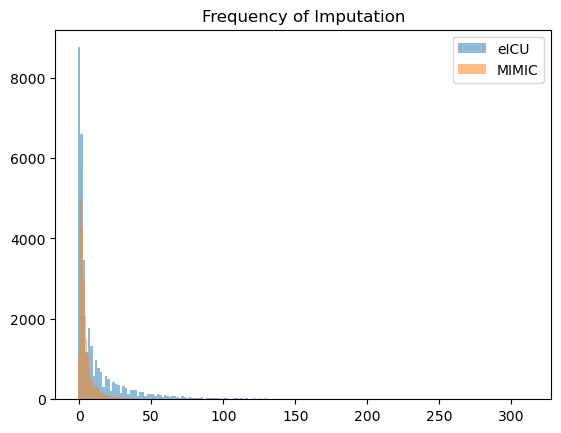

eICU: -1.00 0.00 3.00 14.00 947.00
None
MIMIC: -1.00 1.00 2.00 5.00 1386.00
None


In [ ]:
trimmed = -50
plt.hist(sorted(list_eicu)[:trimmed], bins=int(np.sqrt(len(list_eicu))), alpha=0.5, label="eICU")
plt.hist(sorted(lst_mimic)[:trimmed], bins=int(np.sqrt(len(lst_mimic))), alpha=0.5, label="MIMIC")
plt.legend()
plt.title("Frequency of Imputation")
plt.show()

print(five_num_sum(list_eicu, "eICU"))
print(five_num_sum(lst_mimic, "MIMIC"))

In [ ]:
res = {}
for i, (x,y) in enumerate(zip(pats_eicu["stay"], pats_eicu["period_length"])):
    print(i/len(pats_eicu), end="\r")
    pats = pd.read_csv(f"data_mimicformat/phenotyping/train/{x}")
    pats = pats[pats["itemoffset"] >= 0]
    pats = pats[pats["itemoffset"] <= y]

    count_vals = pats.count()

    for col in pats.columns:
        if col not in res:
            res[col] = [count_vals[col]]
        else:
            res[col].append(count_vals[col])


for key in res:
    print(key, np.median(res[key]))
    

In [ ]:
for key in res:
    print(key, np.median(res[key]))

itemoffset 45.0
Heart Rate 32.0
Invasive BP Diastolic 29.0
Invasive BP Systolic 29.0
O2 Saturation 24.0
Respiratory Rate 29.0
Temperature (C) 9.0
glucose 4.0
Motor 3.0
Eyes 3.0
MAP (mmHg) 0.0
GCS Total 4.0
Verbal 3.0
pH 0.0
FiO2 0.0
admissionheight 45.0
admissionweight 44.0
Capillary Refill 0.0


In [ ]:
res_mimic = {}
for i, (x,y) in enumerate(zip(pats_mimic["stay"], pats_mimic["period_length"])):
    print(i/len(pats_mimic), end="\r")
    pats = pd.read_csv(f"/data/datasets/mimic3-benchmarks/data/phenotyping/train/{x}")
    pats = pats[pats["Hours"] >= 0]
    pats = pats[pats["Hours"] <= y]

    count_vals = pats.count()

    for col in pats.columns:
        if col not in res_mimic:
            res_mimic[col] = [count_vals[col]]
        else:
            res_mimic[col].append(count_vals[col])


for key in res_mimic:
    print(key, np.median(res_mimic[key]))

KeyError: 'itemoffset'

In [ ]:
for key in res_mimic:
    print(key, np.median(res_mimic[key]))

Hours 69.0
Capillary refill rate 0.0
Diastolic blood pressure 48.0
Fraction inspired oxygen 0.0
Glascow coma scale eye opening 13.0
Glascow coma scale motor response 13.0
Glascow coma scale total 5.0
Glascow coma scale verbal response 13.0
Glucose 10.0
Heart Rate 50.0
Height 0.0
Mean blood pressure 48.0
Oxygen saturation 49.0
Respiratory rate 50.0
Systolic blood pressure 48.0
Temperature 13.0
Weight 2.0
pH 2.0


In [ ]:
pats = pd.read_csv("data_mimicformat/phenotyping/test_listfile.csv")
#pats[pats['stay']== "2948041_episode1_timeseries.csv"]
pats

,stay,period_length,Respiratory failure,Essential hypertension,Cardiac dysrhythmias,Fluid disorders,Septicemia,Acute and unspecified renal failure,Pneumonia,Acute cerebrovascular disease,...,DM with complications,Coronary athe,Pleurisy,Other liver diseases,lower respiratory,Hypertension with complications,Conduction disorders,Complications of surgical,upper respiratory,DM without complication
0,162755_episode1_timeseries.csv,17.600000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2868267_episode1_timeseries.csv,25.500000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1562208_episode1_timeseries.csv,65.066667,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,194518_episode1_timeseries.csv,75.966667,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1303033_episode1_timeseries.csv,20.683333,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,145610_episode1_timeseries.csv,30.216667,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7217,2640970_episode1_timeseries.csv,52.266667,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7218,1652488_episode1_timeseries.csv,21.200000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7219,2330944_episode1_timeseries.csv,35.466667,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cool = pd.read_csv("data_mimicformat/phenotyping/train/2948041_episode1_timeseries.csv")
cool.tail()

,itemoffset,Heart Rate,Invasive BP Diastolic,Invasive BP Systolic,O2 Saturation,Respiratory Rate,Temperature (C),glucose,Motor,Eyes,MAP (mmHg),GCS Total,Verbal,pH,FiO2,admissionheight,admissionweight,Capillary Refill
60,61.066667,69.0,64.0,142.0,95.0,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,85.0,NaN
61,61.650000,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,85.0,NaN
62,63.366667,65.0,70.0,146.0,99.0,NaN,36.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,85.0,NaN
63,64.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,170.0,85.0,NaN
64,69.066667,76.0,69.0,160.0,98.0,NaN,36.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,85.0,NaN


In [ ]:
task = "phenotyping"
eicu = "data_mimicformat"
mimic = "/data/datasets/mimic3-benchmarks/data"
data = mimic
should_sort = False
show = True

pats1 = pd.read_csv(f"{data}/{task}/test_listfile.csv")
pats2 = pd.read_csv(f"{data}/{task}/val_listfile.csv")
pats3 = pd.read_csv(f"{data}/{task}/train_listfile.csv")
tr, v, tst = [], [], []
for col in pats1.columns[2:]:
    tr.append(pats1[col].sum()/len(pats1))
    v.append(pats2[col].sum()/len(pats2))
    tst.append(pats3[col].sum()/len(pats3))
    if show: print(f"{col}: {pats1[col].sum()/len(pats1):.3f} {pats2[col].sum()/len(pats2):.3f} {pats3[col].sum()/len(pats3):.3f}")

print()
print()

if should_sort:
    tr.sort(reverse=True)
    v.sort(reverse=True)
    tst.sort(reverse=True)
    for x,y,z in zip(tr,v,tst):
        print(f"{x:.3f} {y:.3f} {z:.3f}")

Acute and unspecified renal failure: 0.212 0.207 0.216
Acute cerebrovascular disease: 0.066 0.075 0.075
Acute myocardial infarction: 0.108 0.103 0.103
Cardiac dysrhythmias: 0.323 0.316 0.322
Chronic kidney disease: 0.132 0.132 0.135
Chronic obstructive pulmonary disease and bronchiectasis: 0.126 0.128 0.132
Complications of surgical procedures or medical care: 0.213 0.201 0.208
Conduction disorders: 0.071 0.070 0.073
Congestive heart failure; nonhypertensive: 0.268 0.264 0.269
Coronary atherosclerosis and other heart disease: 0.331 0.317 0.323
Diabetes mellitus with complications: 0.094 0.095 0.095
Diabetes mellitus without complication: 0.192 0.186 0.194
Disorders of lipid metabolism: 0.289 0.286 0.291
Essential hypertension: 0.423 0.410 0.421
Fluid and electrolyte disorders: 0.265 0.276 0.268
Gastrointestinal hemorrhage: 0.079 0.075 0.072
Hypertension with complications and secondary hypertension: 0.130 0.131 0.133
Other liver diseases: 0.089 0.091 0.089
Other lower respiratory disea

In [ ]:
uq= pats['uniquepid'].unique()
unitstayid = pats['patientunitstayid'].unique()

In [ ]:
len(uq),len(pats), len(unitstayid)

(139367, 200859, 200859)

In [ ]:
#Impute Freq
mimic_17

task = "phenotyping"
eicu = "data_mimicformat"
mimic = "/data/datasets/mimic3-benchmarks/data"
data = mimic

for filename in os.listdir(directory):
pats1 = pd.read_csv(f"{data}/{task}/test_listfile.csv")

IndentationError: expected an indented block after 'for' statement on line 9 (828160441.py, line 10)

In [ ]:
#Impute Freq
#mimic_17

task = "phenotyping"
eicu = "data_mimicformat"
mimic = "/data/datasets/mimic3-benchmarks/data"


mimic17 = [[] for _ in range(18)]
eicu17 = [[] for _ in range(18)]

# n = len(os.listdir(f"{data}/{task}/train"))
# for x,filename in enumerate(os.listdir(f"{data}/{task}/train")):
#     print(f"Processed: {x/n*100:.2f}", end="\r")
#     pats1 = pd.read_csv(f"{data}/{task}/train/"+filename)
#     null_pres = pats1.isnull().sum()/len(pats1)
#     for i in range(18):
#         mimic17[i].append(null_pres.iloc[i])
# print()
data = mimic
n = len(os.listdir(f"{data}/{task}/test"))
for x,filename in enumerate(os.listdir(f"{data}/{task}/test")):
    print(f"Processed: {x/n*100:.2f}", end="\r")
    pats1 = pd.read_csv(f"{data}/{task}/test/"+filename)
    try:
        null_pres = (len(pats1) - pats1.isnull().sum())/pats1['Hours'].max()
    except:
        print(filename)
    for i in range(18):
        mimic17[i].append(null_pres.iloc[i])
print()


data = eicu 

mapper = [0, 9, 2, 14, 12, 13, 15, 8, 5, 4,11, 6, 7, 17, 3, 10, 16, 1]

# n = len(os.listdir(f"{data}/{task}/train"))
# for x,filename in enumerate(os.listdir(f"{data}/{task}/train")):
#     print(f"Processed: {x/n*100:.2f}", end="\r")
#     pats1 = pd.read_csv(f"{data}/{task}/train/"+filename)
#     null_pres = pats1.isnull().sum()/len(pats1)
#     for i in range(18):
#         eicu17[mapper[i]].append(null_pres.iloc[i])
# print()


n = len(os.listdir(f"{data}/{task}/test"))
for x,filename in enumerate(os.listdir(f"{data}/{task}/test")):
    print(f"Processed: {x/n*100:.2f}", end="\r")
    pats1 = pd.read_csv(f"{data}/{task}/test/"+filename)
    null_pres = (len(pats1) - pats1.isnull().sum())/pats1['itemoffset'].max()
    for i in range(18):
        eicu17[mapper[i]].append(null_pres.iloc[i])
print()
# itemoffset,Heart Rate,Invasive BP Diastolic,Invasive BP Systolic,O2 Saturation,
# Respiratory Rate,Temperature (C),glucose,
# Motor,Eyes,MAP (mmHg),GCS Total,Verbal,pH,FiO2,admissionheight,
# admissionweight,Capillary Refill
feats="""Hours
Capillary refill rate
Diastolic blood pressure
Fraction inspired oxygen
Glascow coma scale eye opening
Glascow coma scale motor response
Glascow coma scale total
Glascow coma scale verbal response
Glucose
Heart Rate
Height
Mean blood pressure
Oxygen saturation
Respiratory rate
Systolic blood pressure
Temperature
Weight
pH"""
lst = feats.split("\n")
for i,(m,e) in enumerate(zip(mimic17, eicu17)):
    print(lst[i])
    print(np.mean(m), np.mean(e))

                               stay  period_length  \
0     98994_episode3_timeseries.csv       214.1016   
1     98994_episode1_timeseries.csv      1427.2152   
2     98994_episode2_timeseries.csv       528.2568   
3     28954_episode1_timeseries.csv        26.9376   
4     19129_episode1_timeseries.csv       163.6992   
...                             ...            ...   
6276  19828_episode1_timeseries.csv       104.8008   
6277   9465_episode1_timeseries.csv       527.4048   
6278  48756_episode1_timeseries.csv        35.6904   
6279   1971_episode1_timeseries.csv        28.3656   
6280  18835_episode1_timeseries.csv        16.5000   

      Acute and unspecified renal failure  Acute cerebrovascular disease  \
0                                       0                              0   
1                                       1                              0   
2                                       1                              0   
3                                       0      

In [10]:
#Remove empty dataframes
for task in ["phenotyping", "length-of-stay", "in-hospital-mortality", "decompensation"]:
    for filename in ["train_listfile.csv", "val_listfile.csv", "test_listfile.csv"]:
        print(task, filename)
        inner_folder = "test" if "test" in filename else "train"
        curr = pd.read_csv(f"data_mimicformat/{task}/{filename}")
        rm_entries = []
        for i, file in enumerate(curr["stay"]):
            curr_ts = pd.read_csv(f"data_mimicformat/{task}/{inner_folder}/{file}")
            if len(curr_ts) == 0:
                print()
                print(file)
                #os.remove(f"data_mimicformat/{task}/{inner_folder}/{file}")
                rm_entries.append(file)
            print(i/len(curr), end="\r")
        print()
        
        curr = curr.set_index("stay")
        curr = curr.drop(rm_entries)
        curr = curr.reset_index()
        curr.to_csv(f"data_mimicformat/{task}/{filename}")

    break



phenotyping train_listfile.csv
